#  Visualizing Trend and Seasonality in Time Series

In this notebook, we used two different datasets to demonstrate the concepts of **trend** and **seasonality**.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import  sunspots

In [9]:
data = sunspots.load_pandas().data


In [10]:
data.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


**Preprocessing: Time Index Conversion**

The original dataset contains a `YEAR` column as a float (e.g., 1749.0, 1750.0). Since time series models work best with datetime indexes, we convert this year to a proper datetime object using the `pd.to_datetime()` function.

Assumptions:
- Each year represents January 1st of that year.
- No monthly breakdown exists — it’s annual data.

In [11]:
data['DATE'] = pd.to_datetime(data['YEAR'].astype(int), format='%Y')
data.set_index('DATE', inplace=True)
data = data[['SUNACTIVITY']]
data.rename(columns={'SUNACTIVITY': 'Sunspots'}, inplace=True)

In [12]:
data.head()

,Sunspots
DATE,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


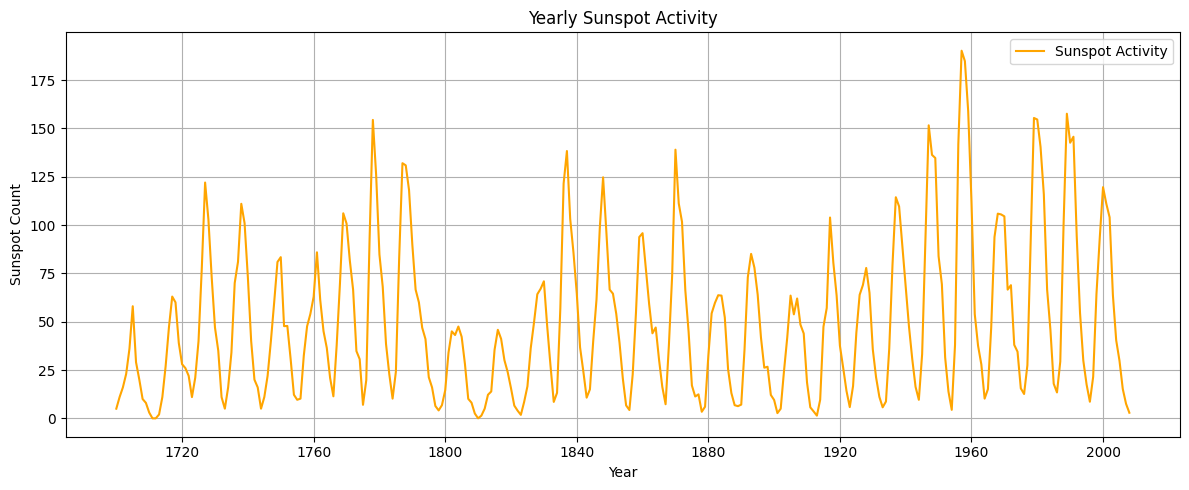

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Sunspots'], color='orange', label='Sunspot Activity')
plt.title('Yearly Sunspot Activity')
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**1. Trend with Rolling Mean (Sunspots Data)**

We used the **Sunspots** dataset (annual data) to demonstrate how `.rolling()` helps capture long-term trends.

In [14]:
# Add rolling mean (window = 11 years)
data['RollingTrend'] = data['Sunspots'].rolling(window=11, center=True).mean()


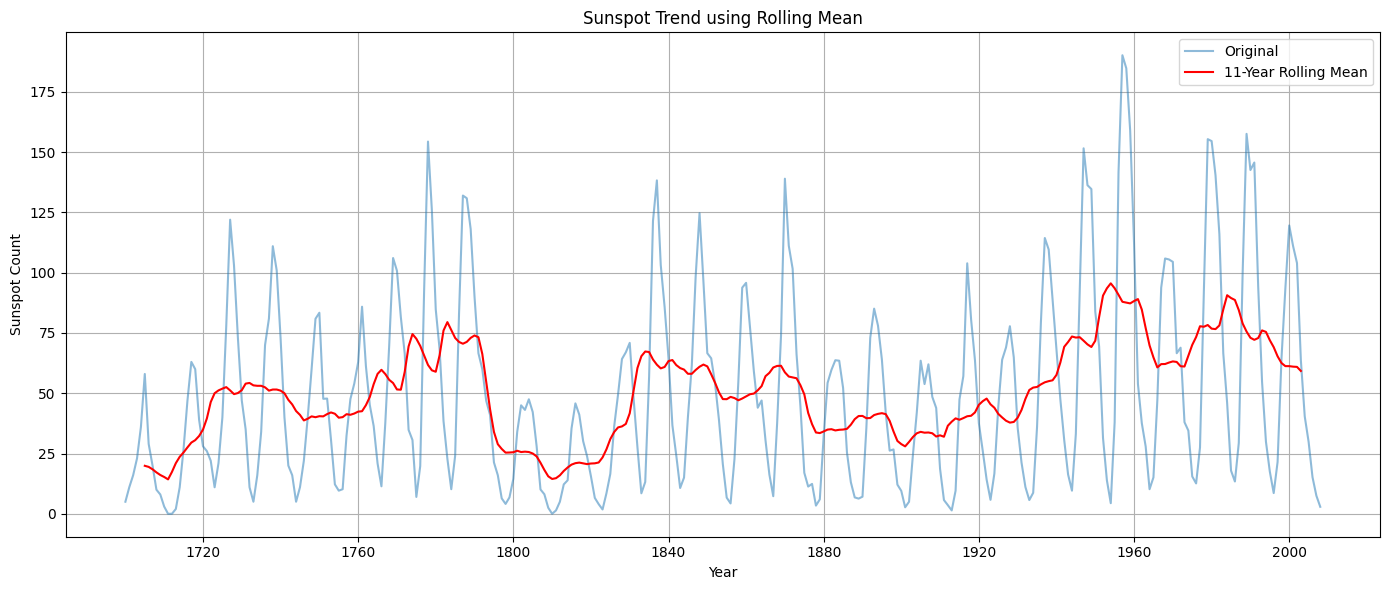

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(data['Sunspots'], label='Original', alpha=0.5)
plt.plot(data['RollingTrend'], label='11-Year Rolling Mean', color='red')
plt.title('Sunspot Trend using Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Seasonality with Grouped Monthly Averages (AirPassengers Data)**

**Dataset:**

Air passengers data 

In [17]:
data = pd.read_csv('/kaggle/input/airpassengers-dataframe/AirPassengers.csv')

In [18]:
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,118,132,129,121,135,148,148,136,119,104,118
1,115,126,141,135,125,149,170,170,158,133,114,140
2,145,150,178,163,172,178,199,199,184,162,146,166
3,171,180,193,181,183,218,230,242,209,191,172,194
4,196,196,236,235,229,243,264,272,237,211,180,201
5,204,188,235,227,234,264,302,293,259,229,203,229
6,242,233,267,269,270,315,364,347,312,274,237,278
7,284,277,317,313,318,374,413,405,355,306,271,306
8,315,301,356,348,355,422,465,467,404,347,305,336
9,340,318,362,348,363,435,491,505,404,359,310,337


Adding the year manually because that data is missing in the actually data

In [19]:
data['Year'] = list(range(1949, 1949 + len(data)))

In [20]:
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,112,118,132,129,121,135,148,148,136,119,104,118,1949
1,115,126,141,135,125,149,170,170,158,133,114,140,1950
2,145,150,178,163,172,178,199,199,184,162,146,166,1951
3,171,180,193,181,183,218,230,242,209,191,172,194,1952
4,196,196,236,235,229,243,264,272,237,211,180,201,1953


changing the format of the data for proper analysis

In [21]:
df = data.melt(id_vars='Year', var_name='Month', value_name='Passengers')

In [22]:
df.head()

,Year,Month,Passengers
0,1949,Jan,112
1,1950,Jan,115
2,1951,Jan,145
3,1952,Jan,171
4,1953,Jan,196


conversion of year and month to proper data because timeseries works better on the datatime format data

In [23]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')
df.set_index('Date', inplace=True)
df = df[['Passengers']]

In [24]:
df.head()

,Passengers
Date,
1949-01-01,112
1950-01-01,115
1951-01-01,145
1952-01-01,171
1953-01-01,196


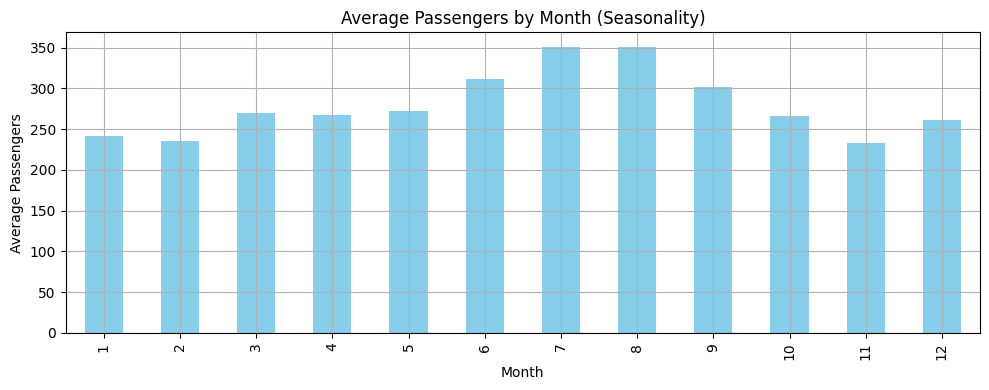

In [27]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Passengers'].mean()

monthly_avg.plot(kind='bar', color='skyblue', figsize=(10, 4))
plt.title("Average Passengers by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()

| Rolling Mean (Trend)            | Seasonality (Repeating Pattern)           |
| ------------------------------- | ----------------------------------------- |
| Applied on Sunspots data        | Applied on AirPassengers data             |
| Smooths short-term fluctuations | Highlights repeating month-level behavior |
| `.rolling(window).mean()`       | `.groupby('Month').mean()`                |
| Shows overall trend over time   | Shows intra-year cyclic behavior          |
